In [9]:
#Paola's issue
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns

# Understanding data

In [10]:
iris = datasets.load_iris()
df2 = pd.DataFrame(data = iris["data"], columns=iris["feature_names"])
df2["target"] = iris["target"]
df2.head(-30)

   # 0:"setosa",
    #1:"versicolor",
    #2:"virginica"


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,2
116,6.5,3.0,5.5,1.8,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

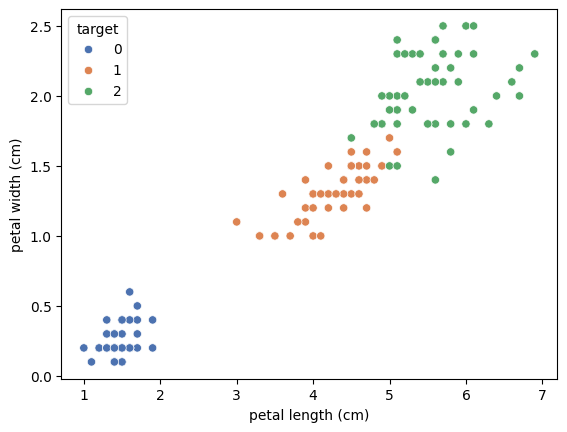

In [14]:
sns.scatterplot(data=df2, x="petal length (cm)", y="petal width (cm)", hue="target",palette="deep")
# 0:"setosa"
# 1:"versicolor",
# 2:"virginica"

In [ ]:
df2['setosa'] = np.where(df2['target']== 0, 1, 0)
df2['versicolor'] = np.where(df2['target']== 1, 1, 0)
df2['virginica'] = np.where(df2['target']== 2, 1, 0)
df2.head(-30)

# Preprocessing

In [ ]:
interestingFeatures = ['petal length (cm)', 'petal width (cm)']

X = df2.loc[:, interestingFeatures]
y = df2.loc[:,["versicolor"]]
df2.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [ ]:
#MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Logistic regression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Accuracy, precision and recall

In [ ]:
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

# Conclusion

Confusion Matrix
TP | FP*  
FN* | TN

Accuracy
#### Virginica: 97%
#### Setosa: 100%
#### Versicolor: 58%

confusion Matrix Virginica
#### 28 | 1
####  0 | 9

confusion Matrix setosa
#### 25 | 1
#### 0  | 13

confusion Matrix Versicolor
#### 22 | 0
#### 16 | 0
In versicolor Logistic regression fail because it doesn't recognize 16 versicolor